In [1]:

# Otter Grader is an autograder that is designed to grade 
# Python and R code. We choose it to grade your assignments. 
# Otter also supports in-notebook checks so that you can 
# check the progress when working through assignments.
# Use the `grader.check()` function in the cells to get feedback on your solution.

# Execute this cell for the first time to install the otter library
!pip install otter-grader

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment1.ipynb")

# CS385/CSD3185/CSD3186: Assignment 1

## Topics Covered
- Linear Regression
- Gradient Descent Algorithm
- Mean Squared Error (MSE)


## Objectives

1. Apply gradient descent algorithm to predict the housing prices in Boston city.  
2. Get familiarized on determining values of hyperparameters and evaluating the performance of a machine learning algorithm.

## Deliverables

Your submission for this assignment should be __ONE__ file - a zip file generated by the `grader.export(_)` function down below under 'Submission'. This function will auto create the zip file which contains this particular completed notebook file for you.  

Subsequently, rename your zip file like this: __coursecode_A1_your_full_name.zip__  
Eg. CS385_A1_john_doe.zip  

To complete this assignment, you should follow instructions in Section Tasks.

## IMPORTANT! READ THIS BEFORE STARTING...
- DO NOT delete existing cells, but you can add more cells in between.
- DO NOT modify the content of the existing cells unless otherwise stated.
- Run the cell with `grader.check(_)` to check your solutions whenever you have completed each tasks.
- Follow the file naming convention for the zip file as spelled out above strictly.
- DO NOT rename this notebook file. It shall be 'assignment1.ipynb'. 

Please adhere strictly to the instructions as stated above as failure to do so might result in deduction of marks by the autograder.

---

Your tasks begins here!!

## Load libraries

In [3]:
# Load necessary libraries here
import pandas as pd
import numpy as np

## Read in data

In [4]:
# DO NOT modify the code below (ensure dataset in same folder as this notebook)
df = pd.read_csv('Boston_housing_price.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Splitting the data

In [5]:
# Separate features (X) and target (y)
X = df.drop("MEDV", axis=1).values  # Convert to numpy array for slicing
y = df["MEDV"].values  # Ensure y is a column vector

 __Task 1__ (5 marks)  
 Split your data into train and test set with train set holding 404 rows and test set with 102 rows.

In [6]:
# Split dataset into Train (404 rows) and Test (102 rows) sets
# Replace ... with your code
X_train = X[:404]
y_train = y[:404]
X_test = X[404:]
y_test = y[404:]

Validate your train and test set.  
`X_train.shape, X_test.shape` should print `(404, 13) (102, 13)`  
`y_train.shape, y_test.shape` should print `(404,) (102,)`

In [7]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 13) (102, 13)
(404,) (102,)


In [8]:
grader.check("task1")

task1 results: All test cases passed!

## Normalization of data

__Task 2__ (15 marks)    
Create a function `z_score_norm` that uses Z-score normalization for features scaling.  
Use numpy vectorization operation instead of using `for` loop to achieve your goal. (Hint: `np.mean()`)

In [9]:
def z_score_norm(X) :
    """
    Normalize dataset using Z-Score normalization.
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, (mean, std)) - tuple, the normalized dataset and mean/std for each feature
    """
    # replace ... with your code
    mean = X.mean(axis=0) # this will compute the mean along the rows for each col(or feature)
    std = X.std(axis=0)   # same for this, just for standard dev.
    X_norm = (X - mean) / std  
    return X_norm, (mean, std)

In [10]:
X_train_norm, z_score_vals = z_score_norm(X_train)

Validate your normalized data. Use `print(np.mean(X_train_norm, axis=0))` and verify if the output is similar as below:  
[-5.27630744e-17 -5.27630744e-17  2.02258452e-16  3.51753830e-17
 -2.63815372e-16  1.93464606e-16 -5.27630744e-17  2.02258452e-16
 -3.51753830e-17 -1.93464606e-16  1.24872610e-15 -1.35425224e-15
  1.05526149e-16]

In [11]:
print(np.mean(X_train_norm, axis=0))


[-5.27630744e-17 -5.27630744e-17  2.02258452e-16  3.51753830e-17
 -2.63815372e-16  1.93464606e-16 -5.27630744e-17  2.02258452e-16
 -3.51753830e-17 -1.93464606e-16  1.24872610e-15 -1.35425224e-15
  1.05526149e-16]


In [12]:
grader.check("task2")

task2 results: All test cases passed!

Alternatively, we can use the StandardScaler class from scikit-learn to normalize the dataset and verify that the results are the same.

In [13]:
from sklearn.preprocessing import StandardScaler

X_train_norm_sk = StandardScaler().fit_transform(X_train)
print(np.mean(X_train_norm_sk, axis=0))

[-5.27630744e-17 -5.27630744e-17  2.02258452e-16  3.51753830e-17
 -2.63815372e-16  1.93464606e-16 -5.27630744e-17  2.02258452e-16
 -3.51753830e-17 -1.93464606e-16  1.24872610e-15 -1.35425224e-15
  1.05526149e-16]


## Mean Squared Error (MSE) function

__Task 3__ (15 marks)    
Create a function to calculate the Mean Squared Error (MSE) for multiple features. The function should take the input features, target values, bias, and weights as inputs, and return the MSE as float.  
*Note: This function will be used in the `train` function later.*  
*Note: Use numpy vectorization method instead of for loop.*

In [14]:
# Mean Squared Error
def loss_MSE(X, Y, b, W) -> float:
    """
    Generalized MSE calculation for multiple features.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
    Outputs: MSE - float
    """
    # replace ... with your code
    # Matrix multiplication of (XW) + bias, which is basically what is happening in the for loop code anyway
    # where each row of X is being multiplied with each weight. -> b + (X[i] * W1), in this case n = num col (for both X and W)
    predicted = X @ W + b 
    MSE = np.mean((predicted - Y) ** 2) # using mean is the same as div by num rows in X
    return float(MSE)

Validate your MSE function by executing the following statement, the output should be:  
670.0209405940593

In [15]:
loss_MSE(X_train, y_train, 0, np.zeros((X_train.shape[1])))

670.0209405940593

In [16]:
grader.check("task3")

task3 results: All test cases passed!

## Bias and weight computation

__Task 4__ (25 marks)  
Create a function to update the bias and weights. The function should return the updated bias and weights as a tuple.  
*Note: This function will be used in the `train` function later.*  
*Note: Use numpy vectorization method instead of for loop.*

In [17]:
# Update Bias and Weights
def update_bias_weights(X, Y, b, W, learning_rate):
    """
    Update bias and weights for multiple features using Gradient Descent.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
            learning_rate - float, the learning rate
    Outputs: (b, W) - tuple, the updated bias and weights
    """
    # replace ... with your code

    dL = X @ W + b
    dL_db = -2 * np.mean((Y - dL))
    
    # Need to transpose X... for matrix mul
    dL_W = -2 * (X.T @ (Y - dL)) / X.shape[0] # cant use mean, have to use div

    b = b - dL_db * learning_rate
    W = W - dL_W * learning_rate

    return b, W

Validate your bias and weight function by executing the following statement, the output should be:  
4.835148514851486  
[5.83764037e+00 8.34692079e+01 4.12637550e+01 4.92772277e-01
 2.50331342e+00 3.16321551e+01 2.95818871e+02 2.06984080e+01
 3.00719307e+01 1.62410193e+03 8.53398366e+01 1.84758496e+03
 4.59696307e+01]

In [18]:
b, W = update_bias_weights(X_train, y_train, 0, np.zeros((X_train.shape[1])), 0.1)
print(b)
print(W)

4.835148514851486
[5.83764037e+00 8.34692079e+01 4.12637550e+01 4.92772277e-01
 2.50331342e+00 3.16321551e+01 2.95818871e+02 2.06984080e+01
 3.00719307e+01 1.62410193e+03 8.53398366e+01 1.84758496e+03
 4.59696307e+01]


In [19]:
grader.check("task4")

task4 results: All test cases passed!

### The training and optimal learning rate function

__Task 5__ (40 marks)   
For this task, you are required to create two functions as detailed below and will be evaluated together by producing the MSE for the best learning rate.

Create a function to train the model. The function will iterate over the training data for a specified number of iterations, updating the bias and weights at each step. The function will return the loss history and the final bias and weights.  
*Note: The loss history is a list of the mean squared error (MSE) after each iteration.*  
*Note: The function will utilize the `loss_MSE` and `update_bias_weights` function.*

In [20]:
# Train Model
def train(X, Y, b, W, learning_rate, learning_iterations):
    """
    Train a linear regression model for multiple features.
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights for features
            learning_rate - float, the learning rate
            learning_iterations - int, the number of training iterations
    Outputs: (loss_history, b, W) - tuple, the loss history and the final bias and weights
    """
    # replace ... with your code
    loss_history = []
    for i in range(learning_iterations):
        b, W = update_bias_weights(X,Y, b, W, learning_rate)
        loss_history.append(loss_MSE(X,Y,b,W))

    return loss_history, b, W

Create a function to find the optimal learning rate for training the model. The learning rate is a hyperparameter of gradient descent algorithm. Choosing the learning rate is challenging. A too small value may result in a long training process, whereas a too large value may result in learning divergence.  
*Note: This function uses the `train` function.*

In [21]:
# Select optimal learning rate
def optimal_learning_rate(X, Y, b, W, learning_rates, learning_iterations):
    """
    Select the best learning rate based on the final MSE.
    Inputs:
        X - numpy.ndarray, the input feature values
        Y - numpy.ndarray, the true output values
        b - float/int, initial bias
        W - numpy.ndarray, initial weights for features
        learning_rates - list, a list of learning rates to evaluate
        learning_iterations - int, the number of training iterations for each learning rate
    Outputs:
        best_lr - float, the learning rate with the lowest final MSE
        best_loss - float, the final MSE for the best learning rate
        results - dict, details of MSE for all learning rates
    """
    # replace ... with your code

    results = {}
    best_lr = float("inf")
    best_loss = float("inf")
    for lr in learning_rates:
        bCopy = b
        WCopy = W
        lh, bCopy, WCopy = train(X,Y,bCopy,WCopy,lr, learning_iterations)
        results[lr] = lh[-1]
        if abs(lh[-1]) < abs(best_loss):
            best_loss = lh[-1]
            best_lr = lr

    return best_lr, best_loss, results

Finally, time to piece all of work or functions completed earlier. Execute the cell below to test if your functions work properly.  
Use the following learning rates: [0.001, 0,1]. For each learning rate, train the model for 10000 iterations and record the final loss.  
If all works, the output should look like:  
<pre>
Results for all learning rates:
Learning rate: 0.001, Final MSE: 22.80830
Learning rate: 0.1, Final MSE: 22.77838

Best learning rate: 0.1 with Final MSE: 22.77838
</pre>

In [22]:
# Initialize bias and weights
initial_b = 0
initial_W = np.zeros((X_train.shape[1]))

# Define learning rates to test
learning_rates = [0.001, 0.1]

# Number of iterations
learning_iterations = 10000

# Find the best learning rate
best_lr, best_loss, all_results = optimal_learning_rate(X_train_norm, y_train, initial_b, initial_W, learning_rates, learning_iterations)


# Print the results
print("\nResults for all learning rates:")
for lr, loss in all_results.items():
    print(f"Learning rate: {lr}, Final MSE: {loss:.5f}")

print(f"\nBest learning rate: {best_lr} with Final MSE: {best_loss:.5f}")


Results for all learning rates:
Learning rate: 0.001, Final MSE: 22.80830
Learning rate: 0.1, Final MSE: 22.77838

Best learning rate: 0.1 with Final MSE: 22.77838


In [23]:
grader.check("task5")

task5 results: All test cases passed!

Plot the loss history for the best learning rate. The loss history should show the MSE decreasing over the training iterations (plot the first 100 iterations). (Hint: use `train` to obtain the loss history)

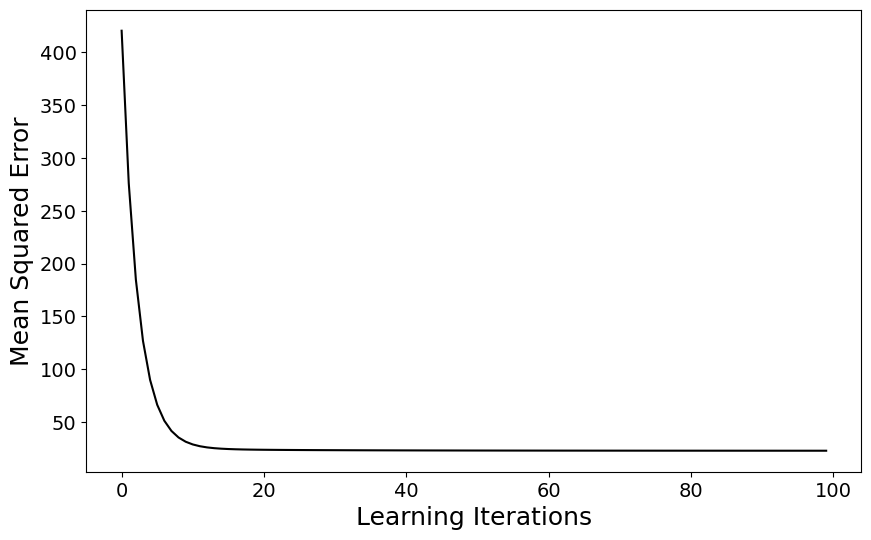

In [24]:
import matplotlib.pyplot as plt

# complete the code below
lh, b , W = train(X_train_norm, y_train, initial_b, initial_W, best_lr, learning_iterations)
itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(itr[:100], lh[:100], color='black')

## Predict on test data

  Perform Z-Score normalization on the test set using the mean and standard deviation values from the training set. Subsequently, evaluate the model on the test set using the final bias and weights from the best learning rate. What is the MSE on the test set?

In [25]:
# Extract mean and std from z_score_vals
means, stds = z_score_vals

# complete the code below
# normalize x_test using means & stds
X_test_norm = (X_test - means) / stds

predicted = np.dot(X_test_norm, W) + b
meanSqError = np.mean((predicted - y_test) ** 2)
print("MSE on the test set: ", meanSqError)

MSE on the test set:  32.799862680206815


---

## <a id='sub-id'></a> Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [26]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    task1 results: All test cases passed!

    task2 results: All test cases passed!

    task3 results: All test cases passed!

    task4 results: All test cases passed!

    task5 results: All test cases passed!
